In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify as mc
% matplotlib inline

# Reading the datasets

In [2]:
y1 = pd.read_csv('./datasets_2/1437.csv')
y2 = pd.read_csv('./datasets_2/1438.csv')
y3 = pd.read_csv('./datasets_2/1439.csv')

y1.head()

,region,month,accidents including damages,accidents including injuries,accidents including mortalities,total number of accidents,injuries,mortalities,intact,total number of people involved in RTA
0,Al-Baha,Moharram,314.0,55.0,4.0,373.0,104.0,5.0,712.0,821.0
1,Al-Baha,Safar,462.0,65.0,11.0,538.0,136.0,15.0,1021.0,1172.0
2,Al-Baha,Rabeea Awal,360.0,48.0,11.0,419.0,107.0,15.0,759.0,881.0
3,Al-Baha,Rabeea Thany,304.0,32.0,8.0,344.0,74.0,9.0,630.0,713.0
4,Al-Baha,Jamad Awal,375.0,50.0,15.0,440.0,118.0,17.0,870.0,1005.0


In [3]:
y1.dropna(inplace=True)
y2.dropna(inplace=True)
y3.dropna(inplace=True)

# Injuries Analysis

In [4]:
# monthly injuries datasets

In [5]:
inj_y1 = y1.pivot_table(index = 'region', columns = 'month', values = 'injuries')[['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga']].reset_index()
inj_y1

month,region,Moharram,Safar,Rabeea Awal,Rabeea Thany,Jamad Awal,Jamad Thany,Ragab,Shaaban,Ramadan,Shawwal,Zy Aqeaada,Zy Alhegga
0,Al-Baha,104.0,136.0,107.0,74.0,118.0,91.0,119.0,103.0,70.0,96.0,123.0,86.0
1,Al-Jouf,40.0,64.0,30.0,37.0,43.0,35.0,53.0,57.0,69.0,48.0,46.0,52.0
2,Al-Qurayyat,29.0,54.0,25.0,16.0,21.0,20.0,43.0,40.0,33.0,21.0,13.0,31.0
3,Ar Riyad,310.0,338.0,333.0,339.0,323.0,343.0,377.0,382.0,469.0,349.0,276.0,368.0
4,Aseer,236.0,191.0,220.0,224.0,185.0,180.0,191.0,223.0,205.0,236.0,222.0,228.0
5,Ash Sharqiyah,430.0,549.0,458.0,497.0,423.0,391.0,369.0,379.0,290.0,335.0,374.0,398.0
6,At-Taif,437.0,435.0,439.0,477.0,516.0,533.0,575.0,390.0,616.0,371.0,394.0,371.0
7,Hail,97.0,85.0,87.0,91.0,80.0,66.0,82.0,85.0,71.0,75.0,56.0,57.0
8,Jazan,203.0,184.0,210.0,184.0,199.0,176.0,195.0,239.0,170.0,162.0,155.0,182.0
9,Jiddah,319.0,365.0,331.0,324.0,310.0,324.0,244.0,308.0,297.0,308.0,303.0,282.0


In [6]:
inj_y2 = y2.pivot_table(index = 'region', columns = 'month', values = 'injuries')[['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga']].reset_index()
inj_y3 = y3.pivot_table(index = 'region', columns = 'month', values = 'injuries')[['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga']].reset_index()

In [7]:
#adding geometry to the datasets

In [8]:
overview = gpd.read_file('./overview.geojson')
overview.head()

,NAME,TOTPOP_CY,x,y,Total injuries,Total mortalities,Number of traffic accidents,Number of people involved in traffic accidents,Number of Accidents including damages,Number of Accidents including injuries,Number of Accidents including mortalities,Percentage of Accidents including damages,Percentage of Accidents including injuries,Percentage of Accidents including mortalities,Accidents per 1000 population,Involvment in traffic accidents per 1000 population,Injuries 1000 population,Mortalities per 1000 population,geometry
0,Makkah,3261577,-398222.616706,2.366203e+06,3400.0,609.0,44915.0,88472.0,43146.0,1311.0,458.0,96.061449,2.918847,1.019704,13.770946,27.125529,1.042441,0.186719,MULTIPOLYGON Z (((-456710.530 2650896.255 0.00...
1,Aseer,2264096,-352045.193083,2.127645e+06,2192.0,696.0,25964.0,50085.0,24608.0,771.0,585.0,94.777384,2.969496,2.253120,11.467712,22.121412,0.968157,0.307407,MULTIPOLYGON Z (((-308858.199 2319738.780 0.00...
2,Tabouk,962936,-698604.846811,3.091249e+06,977.0,293.0,10034.0,9905.0,9247.0,573.0,214.0,92.156667,5.710584,2.132749,10.420215,10.286250,1.014605,0.304278,MULTIPOLYGON Z (((-789203.443 3344744.803 0.00...
3,Jazan,1643752,-377562.520722,1.923485e+06,2112.0,563.0,19572.0,33268.0,18046.0,1098.0,428.0,92.203147,5.610055,2.186797,11.906906,20.239063,1.284865,0.342509,MULTIPOLYGON Z (((-419719.167 1993300.107 0.00...
4,Al-Baha,500452,-509430.926111,2.256117e+06,935.0,111.0,1764.0,3918.0,1193.0,490.0,81.0,67.630385,27.777778,4.591837,3.524814,7.828923,1.868311,0.221799,"POLYGON Z ((-497258.929 2331363.256 0.000, -49..."


In [9]:
inj_y1 = pd.merge(overview[['NAME','TOTPOP_CY','geometry']],inj_y1,
         left_on= 'NAME', right_on='region', right_index=False).drop(columns = 'region')
inj_y2 = pd.merge(overview[['NAME','TOTPOP_CY','geometry']],inj_y2,
         left_on= 'NAME', right_on='region', right_index=False).drop(columns = 'region')
inj_y3 = pd.merge(overview[['NAME','TOTPOP_CY','geometry']],inj_y3,
         left_on= 'NAME', right_on='region', right_index=False).drop(columns = 'region')

In [10]:
#adding the sum and mean columns
for i in [inj_y1, inj_y2,inj_y3]:
    i['sum']=i.iloc[:,3:].sum(axis=1)
    i['mean']= np.round(i.iloc[:,3:-1].mean(axis=1))
    
all_inj = inj_y1['sum'] + inj_y2['sum'] + inj_y3['sum']
mean_inj = np.mean([inj_y1['mean'],inj_y2['mean'],inj_y3['mean']],axis = 0)

In [11]:
# preparing the final dataframe
injuries = inj_y1[['NAME','geometry']].copy()
injuries['all']= all_inj
injuries['average'] = mean_inj
injuries['all_pc'] = (all_inj/ (overview.TOTPOP_CY))*100000
injuries['average_pc'] = (mean_inj/ (overview.TOTPOP_CY))*100000

In [12]:
injuries

,NAME,geometry,all,average,all_pc,average_pc
0,Makkah,MULTIPOLYGON Z (((-456710.530 2650896.255 0.00...,9772.0,271.666667,299.609667,8.329304
1,Aseer,MULTIPOLYGON Z (((-308858.199 2319738.780 0.00...,7101.0,197.333333,313.635111,8.715767
2,Tabouk,MULTIPOLYGON Z (((-789203.443 3344744.803 0.00...,3944.0,109.666667,409.580699,11.388780
3,Jazan,MULTIPOLYGON Z (((-419719.167 1993300.107 0.00...,6578.0,182.666667,400.182023,11.112787
4,Al-Baha,"POLYGON Z ((-497258.929 2331363.256 0.000, -49...",3169.0,88.000000,633.227562,17.584104
5,Al-Jouf,MULTIPOLYGON Z (((-674276.585 3486918.942 0.00...,1368.0,38.000000,382.148524,10.615237
6,Madinah,MULTIPOLYGON Z (((-889704.041 3115476.411 0.00...,9767.0,271.333333,445.301786,12.370761
7,Qaseem,"POLYGON Z ((-477698.887 2859824.348 0.000, -47...",4228.0,117.333333,283.559517,7.869201
8,Ash Sharqiyah,"POLYGON Z ((483440.905 2736363.772 0.000, 4839...",11935.0,331.333333,265.574728,7.372749
9,Hail,"POLYGON Z ((-670450.843 3184778.644 0.000, -67...",2617.0,72.666667,359.461234,9.981219


#### Visualizing the data

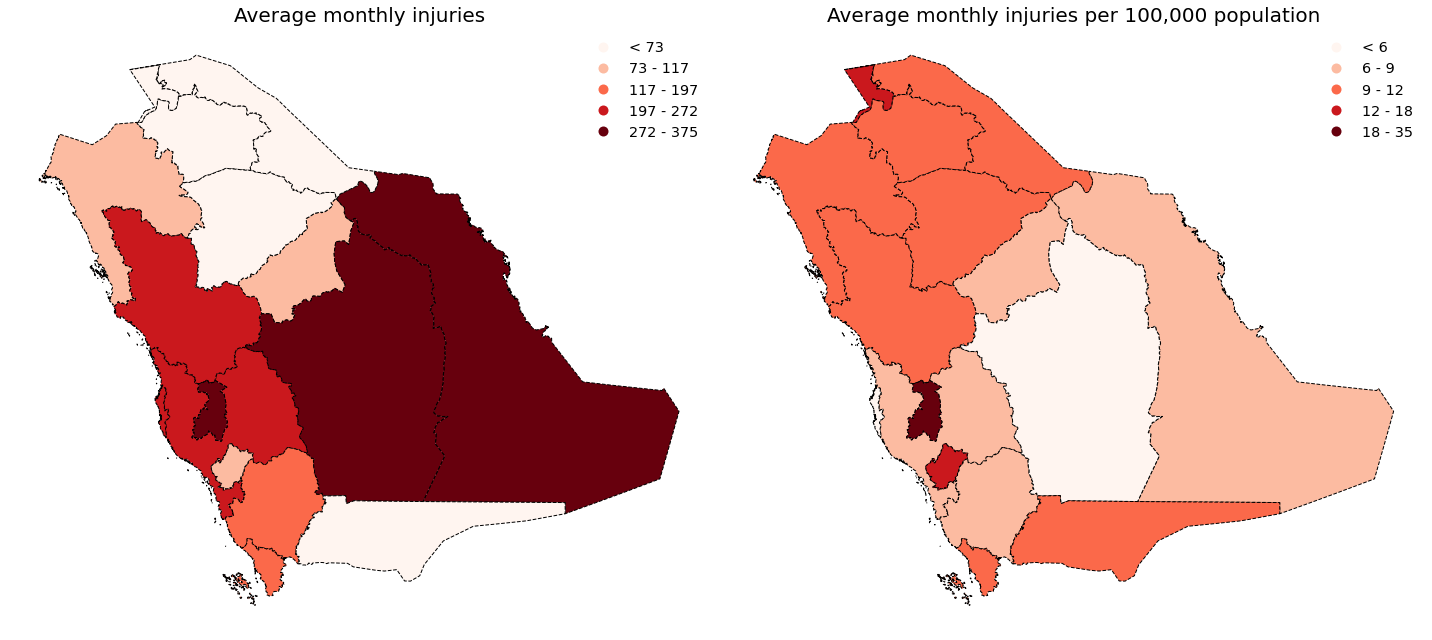

In [13]:
# define the attribute and retrive the dataset
attribute = 'injuries'
df = (locals()[attribute]).copy()
np.random.seed(1992)

# create the figure, axes objects
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (20,20), frameon=False, facecolor='None')

for column, variable in zip([0,1,],['average','average_pc']):

    # make the legend labels
    nb = mc.NaturalBreaks(df[variable], k = 5)
    leg_labels = []
    for i in np.arange(len(nb.bins)):
        if i== 0:
            leg_labels.append('< ' + str(int(np.round(nb.bins)[i])) )
        else:
            leg_labels.append(str(int(np.round(nb.bins)[i-1])) + ' - '+ str(int(np.round(nb.bins)[i])) )

    # plot the maps
    df.plot(column = variable, ax = ax[column], cmap = 'Reds',
            scheme = 'NaturalBreaks', k = 5, legend = True ,
            legend_kwds={'labels':leg_labels, 'frameon':False,
                         'edgecolor':'None', 'facecolor':'None','fontsize':'x-large'},
            edgecolor = 'k', linewidth = 1, linestyle = '--')
    
    # remove unnecessary axes
    ax[column].axis('off')
    ax[column].set_facecolor('None')

# add titles
ax[0].set_title('Average '+ 'monthly ' + attribute , size = 20)
ax[1].set_title('Average '+ 'monthly ' + attribute + ' per 100,000 population' , size = 20)    

# remove excess white spaces
plt.tight_layout()
# save the plot
plt.savefig('./output/heatmaps/'+attribute+'.jpg', dpi = 300)

# Monthly mortalities

In [14]:
#creaing the datasets
mort_y1 = y1.pivot_table(index = 'region', columns = 'month', values = 'mortalities')[['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga']].reset_index()
mort_y2 = y2.pivot_table(index = 'region', columns = 'month', values = 'mortalities')[['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga']].reset_index()
mort_y3 = y3.pivot_table(index = 'region', columns = 'month', values = 'mortalities')[['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga']].reset_index()

In [15]:
#adding goemetry to the datasets
overview = gpd.read_file('./overview.geojson')
mort_y1 = pd.merge(overview[['NAME','TOTPOP_CY','geometry']],mort_y1,
         left_on= 'NAME', right_on='region', right_index=False).drop(columns = 'region')
mort_y2 = pd.merge(overview[['NAME','TOTPOP_CY','geometry']],mort_y2,
         left_on= 'NAME', right_on='region', right_index=False).drop(columns = 'region')
mort_y3 = pd.merge(overview[['NAME','TOTPOP_CY','geometry']],mort_y3,
         left_on= 'NAME', right_on='region', right_index=False).drop(columns = 'region')

In [16]:
#adding the sum and mean columns
for i in [mort_y1, mort_y2,mort_y3]:
    i['sum']=i.iloc[:,3:].sum(axis=1)
    i['mean']= np.round(i.iloc[:,3:-1].mean(axis=1))
    
all_mort = mort_y1['sum'] + mort_y2['sum'] + mort_y3['sum']
mean_mort = np.mean([mort_y1['mean'],mort_y2['mean'],mort_y3['mean']],axis = 0)

In [17]:
# preparing the final dataframe
mortalities = mort_y1[['NAME','geometry']].copy()
mortalities['all']= all_mort
mortalities['average'] = mean_mort
mortalities['all_pc'] = (all_mort/ (overview.TOTPOP_CY))*100000
mortalities['average_pc'] = (mean_mort/ (overview.TOTPOP_CY))*100000

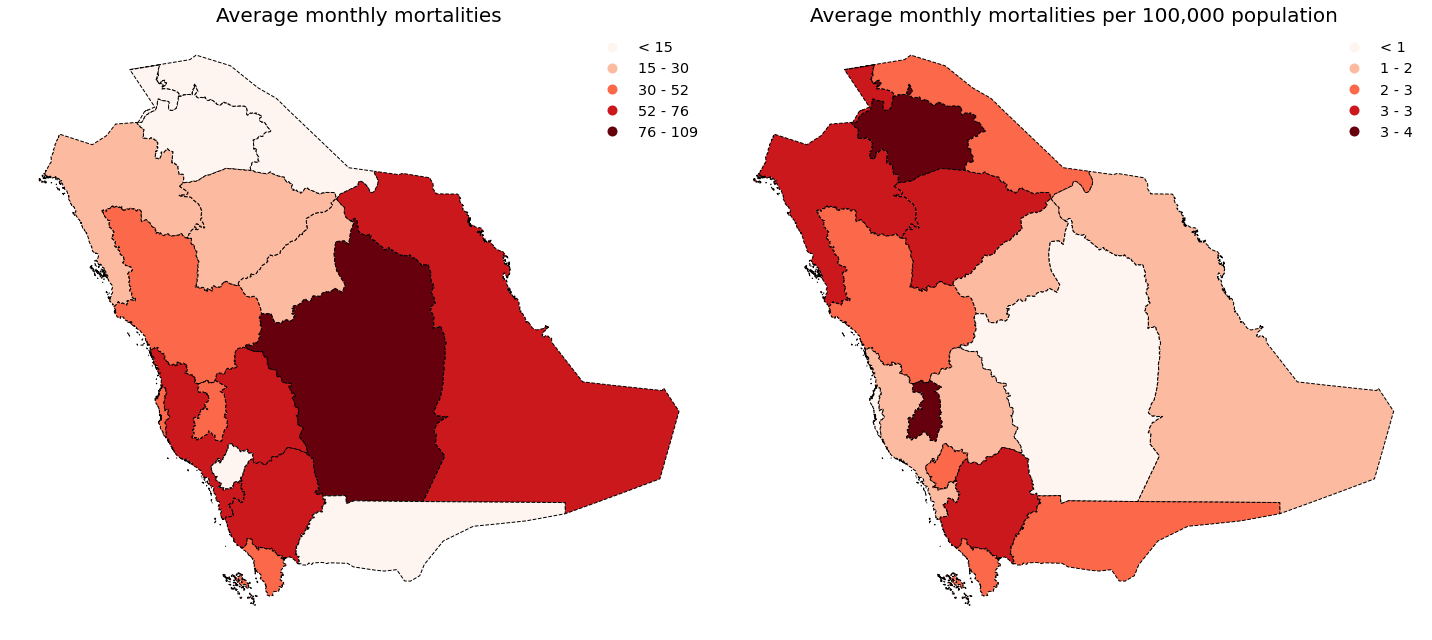

In [18]:
# define the attribute and retrive the dataset
attribute = 'mortalities'
df = (locals()[attribute]).copy()
np.random.seed(1992)

# create the figure, axes objects
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (20,20), frameon=False, facecolor='None')

for column, variable in zip([0,1,],['average','average_pc']):

    # make the legend labels
    nb = mc.NaturalBreaks(df[variable], k = 5)
    leg_labels = []
    for i in np.arange(len(nb.bins)):
        if i== 0:
            leg_labels.append('< ' + str(int(np.round(nb.bins)[i])) )
        else:
            leg_labels.append(str(int(np.round(nb.bins)[i-1])) + ' - '+ str(int(np.round(nb.bins)[i])) )

    # plot the maps
    df.plot(column = variable, ax = ax[column], cmap = 'Reds',
            scheme = 'NaturalBreaks', k = 5, legend = True ,
            legend_kwds={'labels':leg_labels, 'frameon':False,
                         'edgecolor':'None', 'facecolor':'None','fontsize':'x-large'},
            edgecolor = 'k', linewidth = 1, linestyle = '--')
    
    # remove unnecessary axes
    ax[column].axis('off')
    ax[column].set_facecolor('None')

# add titles
ax[0].set_title('Average '+ 'monthly ' + attribute , size = 20)
ax[1].set_title('Average '+ 'monthly ' + attribute + ' per 100,000 population' , size = 20)    

# remove excess white spaces
plt.tight_layout()
# save the plot
plt.savefig('./output/heatmaps/'+attribute+'.jpg', dpi = 300)

# Monthly involvment

In [19]:
#creating the ddatasets
inv_y1 = y1.pivot_table(index = 'region', columns = 'month', values = 'total number of people involved in RTA')[['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga']].reset_index()
inv_y2 = y2.pivot_table(index = 'region', columns = 'month', values = 'total number of people involved in RTA')[['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga']].reset_index()
inv_y3 = y3.pivot_table(index = 'region', columns = 'month', values = 'total number of people involved in RTA')[['Moharram', 'Safar', 'Rabeea Awal', 'Rabeea Thany', 'Jamad Awal',
       'Jamad Thany', 'Ragab', ' Shaaban', ' Ramadan', ' Shawwal',
       'Zy Aqeaada', 'Zy Alhegga']].reset_index()

In [20]:
#adding geometry to the datasets
overview = gpd.read_file('./overview.geojson')
inv_y1 = pd.merge(overview[['NAME','TOTPOP_CY','geometry']],inv_y1,
         left_on= 'NAME', right_on='region', right_index=False).drop(columns = 'region')
inv_y2 = pd.merge(overview[['NAME','TOTPOP_CY','geometry']],inv_y2,
         left_on= 'NAME', right_on='region', right_index=False).drop(columns = 'region')
inv_y3 = pd.merge(overview[['NAME','TOTPOP_CY','geometry']],inv_y3,
         left_on= 'NAME', right_on='region', right_index=False).drop(columns = 'region')

In [21]:
#adding the sum and mean columns
for i in [inv_y1, inv_y2,inv_y3]:
    i['sum']=i.iloc[:,3:].sum(axis=1)
    i['mean']= np.round(i.iloc[:,3:-1].mean(axis=1))
    
all_inv = inv_y1['sum'] + inv_y2['sum'] + inv_y3['sum']
mean_inv = np.mean([inv_y1['mean'],inv_y2['mean'],inv_y3['mean']],axis = 0)

In [22]:
# preparing the final dataframe
involvment = inv_y1[['NAME','geometry']].copy()
involvment['all']= all_inv
involvment['average'] = mean_inv
involvment['all_pc'] = (all_inv/ (overview.TOTPOP_CY))*100000
involvment['average_pc'] = (mean_inv/ (overview.TOTPOP_CY))*100000

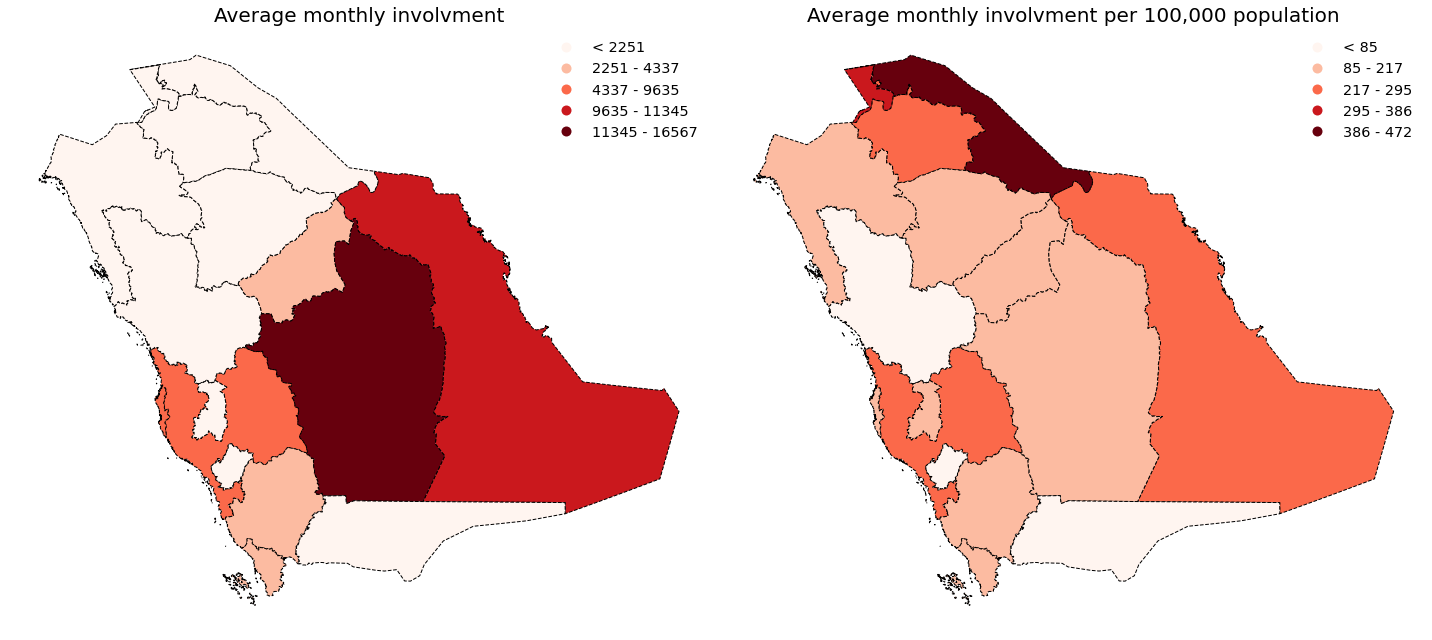

In [23]:
# define the attribute and retrive the dataset
attribute = 'involvment'
df = (locals()[attribute]).copy()
np.random.seed(1992)

# create the figure, axes objects
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (20,20), frameon=False, facecolor='None')

for column, variable in zip([0,1,],['average','average_pc']):

    # make the legend labels
    nb = mc.NaturalBreaks(df[variable], k = 5)
    leg_labels = []
    for i in np.arange(len(nb.bins)):
        if i== 0:
            leg_labels.append('< ' + str(int(np.round(nb.bins)[i])) )
        else:
            leg_labels.append(str(int(np.round(nb.bins)[i-1])) + ' - '+ str(int(np.round(nb.bins)[i])) )

    # plot the maps
    df.plot(column = variable, ax = ax[column], cmap = 'Reds',
            scheme = 'NaturalBreaks', k = 5, legend = True ,
            legend_kwds={'labels':leg_labels, 'frameon':False,
                         'edgecolor':'None', 'facecolor':'None','fontsize':'x-large'},
            edgecolor = 'k', linewidth = 1, linestyle = '--')
    
    # remove unnecessary axes
    ax[column].axis('off')
    ax[column].set_facecolor('None')

# add titles
ax[0].set_title('Average '+ 'monthly ' + attribute , size = 20)
ax[1].set_title('Average '+ 'monthly ' + attribute + ' per 100,000 population' , size = 20)    

# remove excess white spaces
plt.tight_layout()
# save the plot
plt.savefig('./output/heatmaps/'+attribute+'.jpg', dpi = 300)

# Compiling the dataset

In [24]:
injuries

,NAME,geometry,all,average,all_pc,average_pc
0,Makkah,MULTIPOLYGON Z (((-456710.530 2650896.255 0.00...,9772.0,271.666667,299.609667,8.329304
1,Aseer,MULTIPOLYGON Z (((-308858.199 2319738.780 0.00...,7101.0,197.333333,313.635111,8.715767
2,Tabouk,MULTIPOLYGON Z (((-789203.443 3344744.803 0.00...,3944.0,109.666667,409.580699,11.388780
3,Jazan,MULTIPOLYGON Z (((-419719.167 1993300.107 0.00...,6578.0,182.666667,400.182023,11.112787
4,Al-Baha,"POLYGON Z ((-497258.929 2331363.256 0.000, -49...",3169.0,88.000000,633.227562,17.584104
5,Al-Jouf,MULTIPOLYGON Z (((-674276.585 3486918.942 0.00...,1368.0,38.000000,382.148524,10.615237
6,Madinah,MULTIPOLYGON Z (((-889704.041 3115476.411 0.00...,9767.0,271.333333,445.301786,12.370761
7,Qaseem,"POLYGON Z ((-477698.887 2859824.348 0.000, -47...",4228.0,117.333333,283.559517,7.869201
8,Ash Sharqiyah,"POLYGON Z ((483440.905 2736363.772 0.000, 4839...",11935.0,331.333333,265.574728,7.372749
9,Hail,"POLYGON Z ((-670450.843 3184778.644 0.000, -67...",2617.0,72.666667,359.461234,9.981219


In [25]:
mortalities

,NAME,geometry,all,average,all_pc,average_pc
0,Makkah,MULTIPOLYGON Z (((-456710.530 2650896.255 0.00...,2288.0,63.666667,70.150114,1.952021
1,Aseer,MULTIPOLYGON Z (((-308858.199 2319738.780 0.00...,2507.0,69.666667,110.728520,3.077019
2,Tabouk,MULTIPOLYGON Z (((-789203.443 3344744.803 0.00...,1075.0,29.666667,111.637741,3.080855
3,Jazan,MULTIPOLYGON Z (((-419719.167 1993300.107 0.00...,1543.0,43.000000,93.870608,2.615966
4,Al-Baha,"POLYGON Z ((-497258.929 2331363.256 0.000, -49...",430.0,11.666667,85.922326,2.331226
5,Al-Jouf,MULTIPOLYGON Z (((-674276.585 3486918.942 0.00...,441.0,12.333333,123.192616,3.445296
6,Madinah,MULTIPOLYGON Z (((-889704.041 3115476.411 0.00...,1885.0,52.000000,85.941831,2.370809
7,Qaseem,"POLYGON Z ((-477698.887 2859824.348 0.000, -47...",941.0,26.333333,63.110101,1.766099
8,Ash Sharqiyah,"POLYGON Z ((483440.905 2736363.772 0.000, 4839...",2737.0,76.000000,60.903061,1.691134
9,Hail,"POLYGON Z ((-670450.843 3184778.644 0.000, -67...",757.0,21.000000,103.978660,2.884481


In [26]:
involvment

,NAME,geometry,all,average,all_pc,average_pc
0,Makkah,MULTIPOLYGON Z (((-456710.530 2650896.255 0.00...,346858.0,9635.000000,10634.671510,295.409245
1,Aseer,MULTIPOLYGON Z (((-308858.199 2319738.780 0.00...,156135.0,4337.000000,6896.129846,191.555482
2,Tabouk,MULTIPOLYGON Z (((-789203.443 3344744.803 0.00...,63965.0,1776.666667,6642.705227,184.505166
3,Jazan,MULTIPOLYGON Z (((-419719.167 1993300.107 0.00...,120533.0,3348.000000,7332.797162,203.680361
4,Al-Baha,"POLYGON Z ((-497258.929 2331363.256 0.000, -49...",15284.0,424.333333,3054.039149,84.790016
5,Al-Jouf,MULTIPOLYGON Z (((-674276.585 3486918.942 0.00...,30176.0,838.000000,8429.615393,234.093906
6,Madinah,MULTIPOLYGON Z (((-889704.041 3115476.411 0.00...,33306.0,925.000000,1518.503253,42.173047
7,Qaseem,"POLYGON Z ((-477698.887 2859824.348 0.000, -47...",116644.0,3240.000000,7822.969796,217.297265
8,Ash Sharqiyah,"POLYGON Z ((483440.905 2736363.772 0.000, 4839...",408424.0,11345.000000,9088.151896,252.446191
9,Hail,"POLYGON Z ((-670450.843 3184778.644 0.000, -67...",39757.0,1104.333333,5460.871333,151.687055


In [33]:
(( inj_y1['mean'] - inj_y3['mean'])/ inj_y1['mean'])*100

0     -8.846154
1     13.679245
2     43.750000
3      6.382979
4     23.529412
5     45.833333
6     36.389685
7     15.873016
8     39.460784
9      2.564103
10    32.075472
11    -8.262108
12     8.474576
13    20.322581
14    35.853132
15    13.793103
Name: mean, dtype: float64

In [32]:
((( inj_y1['mean'] - inj_y3['mean'])/ inj_y1['mean'])*100).mean()

20.05457239831216

In [34]:
(( mort_y1['mean'] - mort_y3['mean'])/ mort_y1['mean'])*100

0     37.037037
1     29.268293
2     33.333333
3     -9.302326
4     40.000000
5     46.666667
6     41.176471
7     42.424242
8     40.860215
9     36.000000
10    62.500000
11    23.529412
12    -7.142857
13    46.153846
14    44.444444
15    16.666667
Name: mean, dtype: float64

In [35]:
((( mort_y1['mean'] - mort_y3['mean'])/ mort_y1['mean'])*100).mean()

32.72596525572598

In [36]:
((( inv_y1['mean'] - inv_y3['mean'])/ inv_y1['mean'])*100).mean()

29.67698028492579

In [52]:
inj_y1.columns

Index(['NAME', 'TOTPOP_CY', 'geometry', 'Moharram', 'Safar', 'Rabeea Awal',
       'Rabeea Thany', 'Jamad Awal', 'Jamad Thany', 'Ragab', ' Shaaban',
       ' Ramadan', ' Shawwal', 'Zy Aqeaada', 'Zy Alhegga', 'sum', 'mean'],
      dtype='object')

In [55]:
((inj_y1[' Ramadan']+inj_y2[' Ramadan']+
  inj_y3[' Ramadan']).sum())

9076.0

In [56]:
 ((inj_y1['Zy Alhegga']+ inj_y2['Zy Alhegga']+inj_y3['Zy Alhegga']).sum())

8182.0

In [45]:
(mort_y1[' Ramadan']+mort_y2[' Ramadan']+mort_y3[' Ramadan']).sum()

2217.0

In [57]:
 ((mort_y1['Zy Alhegga']+ mort_y2['Zy Alhegga']+mort_y3['Zy Alhegga']).sum())

1883.0

In [50]:
injuries['all'].sum()

101536.0

In [51]:
mortalities['all'].sum()

22545.0

In [66]:
inj_months = (inj_y1.transpose().iloc[3:,
            :].sum(axis=1))+(inj_y2.transpose().iloc[3:,
            :].sum(axis=1))+(inj_y3.transpose().iloc[3:,:].sum(axis=1))

In [68]:
mort_months = (mort_y1.transpose().iloc[3:,
            :].sum(axis=1))+(mort_y2.transpose().iloc[3:,
            :].sum(axis=1))+(mort_y3.transpose().iloc[3:,:].sum(axis=1))

In [69]:
inv_months = (inv_y1.transpose().iloc[3:,
            :].sum(axis=1))+(inv_y2.transpose().iloc[3:,
            :].sum(axis=1))+(inv_y3.transpose().iloc[3:,:].sum(axis=1))

In [79]:
fatality = np.round((((inj_months.values+mort_months.values)/(inv_months.values))*100),1)

In [85]:
monthly_casualties = pd.DataFrame({'Month':inv_months.index, 'Injuries' :inj_months.values , 
              'Mortalities' :mort_months.values , 'Involvment' :inv_months.values,
             'Fatality rate %': fatality }).drop([13],axis = 0)
monthly_casualties.to_csv('monthly casualties 3 years.csv')
monthly_casualties

,Month,Injuries,Mortalities,Involvment,Fatality rate %
0,Moharram,8297.0,1921.0,224650.0,4.5
1,Safar,8896.0,1933.0,214185.0,5.1
2,Rabeea Awal,9056.0,1907.0,222143.0,4.9
3,Rabeea Thany,8731.0,2014.0,216322.0,5.0
4,Jamad Awal,8439.0,1763.0,214535.0,4.8
5,Jamad Thany,8367.0,1750.0,220940.0,4.6
6,Ragab,8545.0,1789.0,203406.0,5.1
7,Shaaban,8536.0,1729.0,213619.0,4.8
8,Ramadan,9076.0,2217.0,189524.0,6.0
9,Shawwal,8153.0,1953.0,176489.0,5.7
